In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib widget

In [45]:
Data = pd.read_csv(r"C:\Users\adity\OneDrive\Desktop\Linear_reg_Scratch\Data\Student_Performance.csv")
Data = Data.drop("Extracurricular Activities", axis=1)
Data = Data / Data.max()
Data

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,0.777778,1.000000,1.000000,0.111111,0.91
1,0.444444,0.828283,0.444444,0.222222,0.65
2,0.888889,0.515152,0.777778,0.222222,0.45
3,0.555556,0.525253,0.555556,0.222222,0.36
4,0.777778,0.757576,0.888889,0.555556,0.66
...,...,...,...,...,...
9995,0.111111,0.494949,0.444444,0.222222,0.23
9996,0.777778,0.646465,0.888889,0.555556,0.58
9997,0.666667,0.838384,0.888889,0.555556,0.74
9998,1.000000,0.979798,0.777778,0.000000,0.95


In [46]:
def calc_cost(w, b, data):
    X = data.drop("Performance Index", axis=1).values
    Y = data["Performance Index"].values
    y_preds = np.dot(X, w) + b
    m = len(data)
    j = (1 / (2 * m)) * np.sum((y_preds - Y) ** 2)
    return j


In [47]:
def gradient_descent(w_current, b_current, data, LR):
    m = len(data)

    X = data.drop("Performance Index", axis=1).values
    Y = data["Performance Index"].values

    y_preds = np.dot(X, w_current) + b_current

    w_grad = (1 / m) * np.dot(X.T, (y_preds - Y))      
    b_grad = (1 / m) * np.sum(y_preds - Y)  

    w = w_current - LR * w_grad
    b = b_current - LR * b_grad

    return w, b
    


In [48]:
w = np.zeros(Data.shape[1] - 1)
j_val_overtime = np.zeros(2000)
b = 0
LR = 0.001
epochs = 2000
for i in range(epochs):
    w, b = gradient_descent(w, b, Data, LR)
    j_val_overtime[i] = calc_cost(w, b, Data)
w, b

(array([0.13426685, 0.19252763, 0.13949406, 0.08998442]),
 np.float64(0.19920969084131285))

In [49]:
j = calc_cost(w, b, Data)
j


np.float64(0.011367597929239014)

In [50]:
example_data = np.array([0.777778, 0.646465, 0.888889, 0.555556])

y = np.dot(example_data, w) + b
y * 100

np.float64(60.208798534702844)

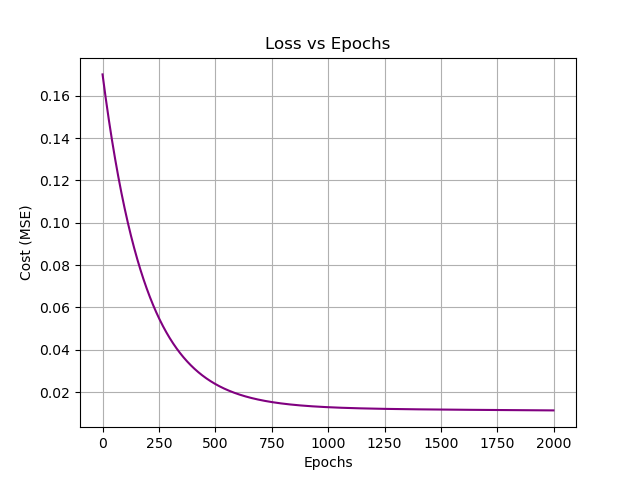

In [51]:
y_for_plot = np.linspace(0,1000,1000)
fig, ax = plt.subplots()
ax.plot(range(len(j_val_overtime)), j_val_overtime, color='purple')
ax.set_xlabel("Epochs")
ax.set_ylabel("Cost (MSE)")
ax.set_title("Loss vs Epochs")
ax.grid(True)

plt.show()